# Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset

In [2]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\dug\\drug200.csv')
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [6]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [7]:
data.shape

(200, 6)

In [11]:
data.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [12]:
len(data.Drug.unique())

5

# Preprocessing of dataset

In [13]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# Correlation matrix

In [14]:
data.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<AxesSubplot:>

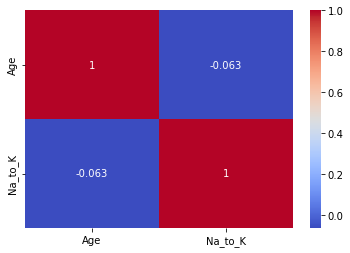

In [15]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

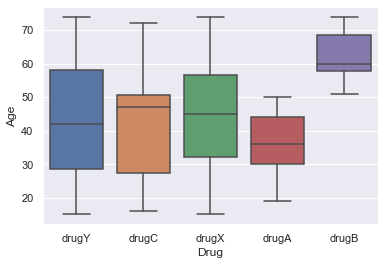

In [74]:
sns.set_theme(style="darkgrid")
sns.boxplot(x= "Drug", y="Age", data = data)
plt.show()

# Train and Test

In [75]:
X = data.drop(['Drug'], axis=1)
y = data['Drug']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [76]:
X_train.shape, X_test.shape

((134, 5), (66, 5))

In [77]:
y_train.shape,y_test.shape

((134,), (66,))

In [78]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
42,50,M,NORMAL,NORMAL,15.790
189,64,M,HIGH,NORMAL,20.932
90,62,M,NORMAL,HIGH,16.594
136,55,F,HIGH,HIGH,10.977
51,67,M,NORMAL,NORMAL,10.898


In [79]:
# import category encoders
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [80]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
42,50,1,1,1,15.790
189,64,1,2,1,20.932
90,62,1,1,2,16.594
136,55,2,2,2,10.977
51,67,1,1,1,10.898


In [81]:
X_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,1,3,1,11.424
15,16,2,2,1,15.516
30,18,2,1,1,8.750
158,59,2,3,2,10.444
128,47,1,3,1,33.542


#  import DecisionTreeClassifier with criterion gini

In [82]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [83]:
y_pred_gini = clf_gini.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.8485


In [85]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8358


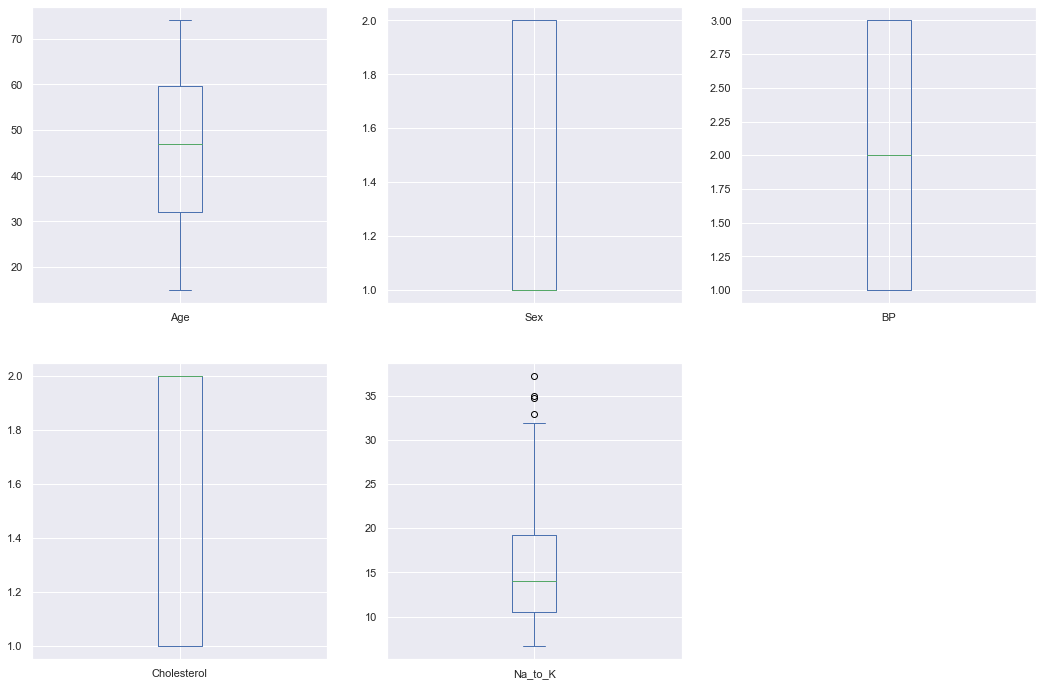

In [86]:
X_train.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(18,12))
plt.show()

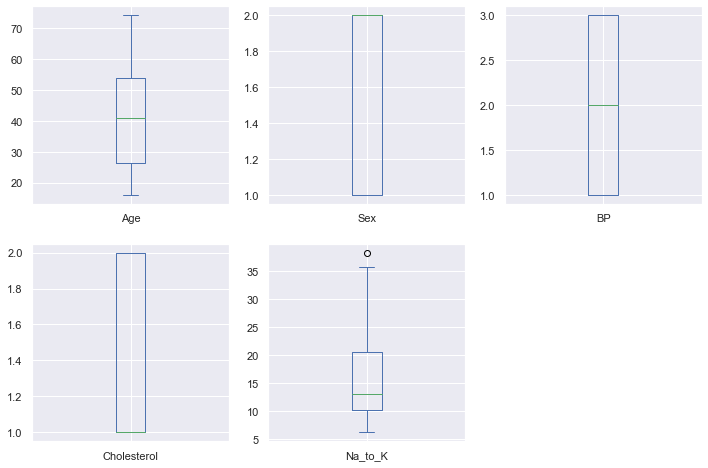

In [87]:
X_test.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False,  figsize=(12,8))
plt.show()

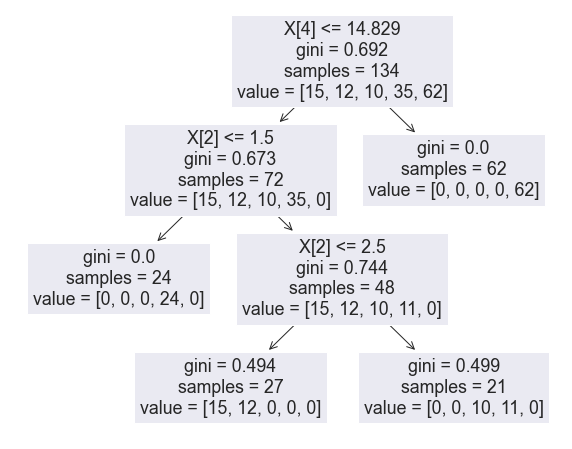

In [88]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(clf_gini.fit(X_train, y_train)) 
plt.show()

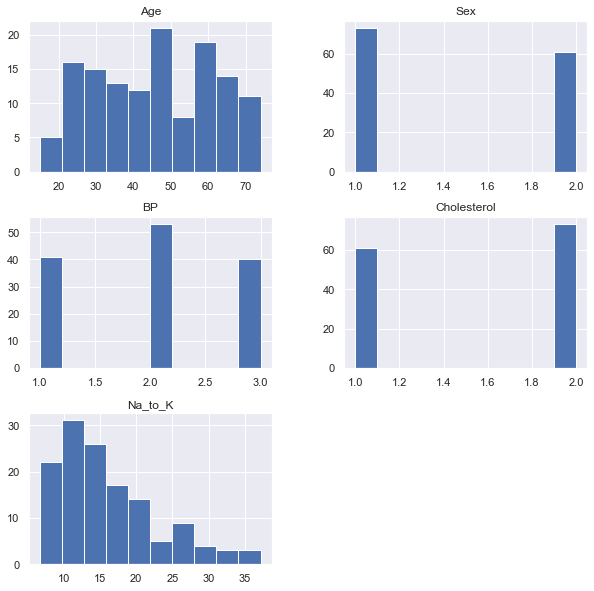

In [89]:
X_train.hist(figsize=(10,10))
plt.show()

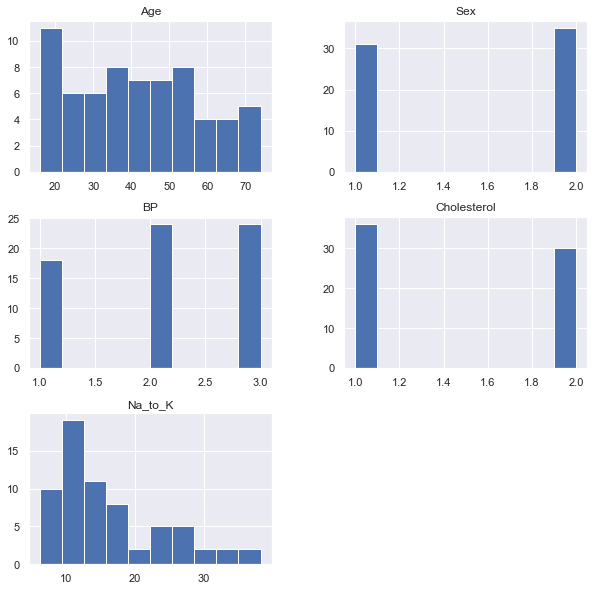

In [90]:
X_test.hist(figsize=(10,10))
plt.show()

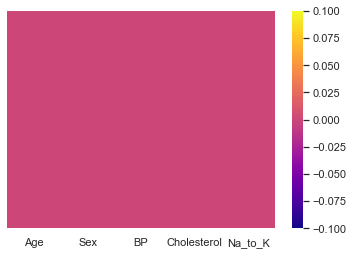

In [91]:
sns.heatmap(X_train.isnull(), yticklabels = False, cmap = "plasma")
plt.show()

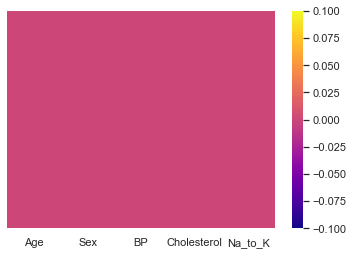

In [92]:
sns.heatmap(X_test.isnull(), yticklabels = False, cmap = "plasma")
plt.show()

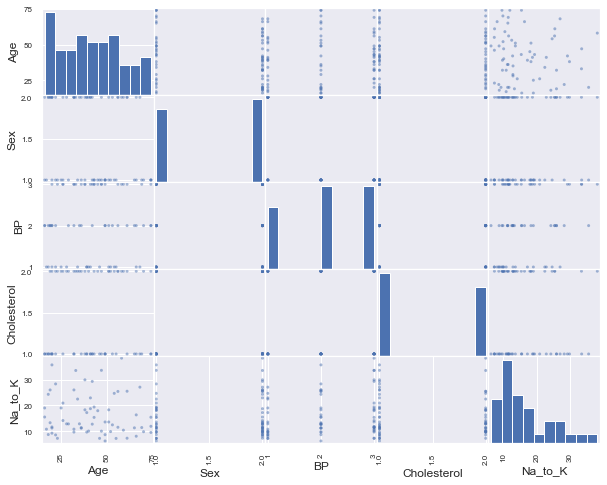

In [93]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_test, figsize=(10,8))
plt.show()

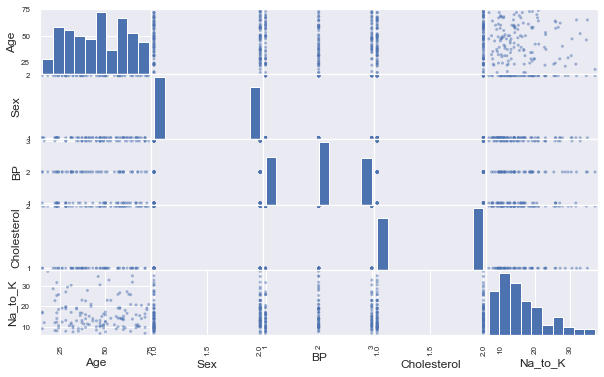

In [94]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_train, figsize=(10,6))
plt.show()

#  DecisionTreeClassifier model with criterion entropy

In [95]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))


Model accuracy score with criterion entropy: 0.8485


In [96]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8358


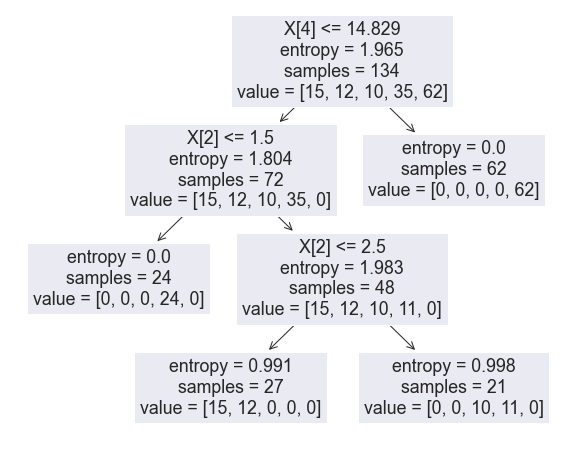

In [97]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 
plt.show()

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_en)

array([[ 8,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 29]], dtype=int64)

In [99]:
if accuracy_score(y_test, y_pred_gini) > accuracy_score(y_train, y_pred_train_en):
   print("Gini Index Criterion is Better and it has accuracy equal to ", accuracy_score(y_test, y_pred_gini)*100) 
else:
    print("Entropy Criterion is Better and it has accuracy equal to ", accuracy_score(y_train, y_pred_train_en)*100)

Gini Index Criterion is Better and it has accuracy equal to  84.84848484848484
